In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import configparser
from adaline import AdalineGD

In [12]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution))
    # import pdb; pdb.set_trace()
    Z = classifier.predict(
        np.array(
            [xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=cmap(idx),
            marker=markers[idx],
            label=cl)

In [13]:
inifile = configparser.ConfigParser()
inifile.read('../config.ini')
df = pd.read_csv(
    inifile.get('url', 'iris'), header=None)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

In [14]:
X_std = np.copy(X)

In [15]:
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()

In [16]:
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [17]:
ada = AdalineGD(n_iter=15, eta=0.01)

In [18]:
ada.fit(X_std, y)

In [19]:
plot_decision_regions(X_std, y, classifier=ada)

In [20]:
plt.title('Adaline - Gradient Descent')

Text(0.5,1,'Adaline - Gradient Descent')

In [21]:
plt.xlabel('sepal length [standardized]')

Text(0.5,0,'sepal length [standardized]')

In [22]:
plt.ylabel('petal length [standardized]')

Text(0,0.5,'petal length [standardized]')

In [23]:
plt.legend(loc='upper left')

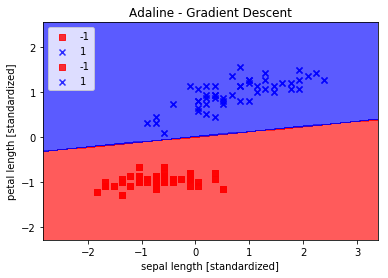

In [24]:
plt.show()

In [25]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')

In [26]:
plt.xlabel('Epochs')

Text(0.5,0,'Epochs')

In [27]:
plt.ylabel('Sum-squared-error')

Text(0,0.5,'Sum-squared-error')

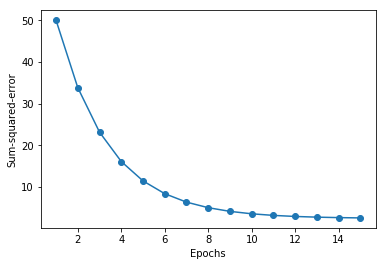

In [28]:
plt.show()